In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing

import matplotlib.pyplot as plt
from matplotlib import cm 
import seaborn as sns
sns.set_style('white')
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline
from pandas.plotting import parallel_coordinates

from ipywidgets import interact
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

import warnings
warnings.filterwarnings('ignore')

## 3. 클러스터링
### 3.1 K-Means Clustering

In [2]:
df = pd.read_csv('final_tmp(Jihyun).csv', thousands=',', encoding='cp949')
df.head()

,기준_년_코드,역명,호선,장애인편의시설,만남의장소,현장사무소,민원안내,환승주차장,지하철이용객수,자전거보관가능대수,...,구간이동전입.1,구간이동전출.1,시도간이동전입.1,시도간이동전출.1,거주_세대_수.1,거주인구_총계.1,거주인구_남자.1,거주인구_여자.1,세대당인구.1,고령자_65세이상.1
0,2016,4.19민주묘지역,우이신설,0,0,0,0,0,0.829532,0.755984,...,1009,1238,2476,925,9489,21391,10393,10998,2,4557
1,2016,가락시장역,3,0,0,0,0,0,0.520235,0.919707,...,4445,1017,12170,1265,11345,29837,14646,15191,2,3321
2,2016,가락시장역,8,1,0,0,0,0,0.475656,0.818231,...,4445,1017,12170,1265,11345,29837,14646,15191,2,3321
3,2016,가산디지털단지역,7,1,0,0,0,0,0.889632,0.775517,...,1908,1930,5440,2462,13767,24455,13720,10735,1,2414
4,2016,가양역,9,0,0,0,0,0,0.527622,0.784574,...,2532,1872,5831,1778,15720,42579,20772,21807,2,3963


In [3]:
# 지하철 특성에 대한 입력변수만 추출
df_sub = df[['장애인편의시설', '만남의장소', '현장사무소', '민원안내', '환승주차장', '지하철이용객수', '자전거보관가능대수', 
                    '환승거리', '환승역개수', '엘리베이터', '에스컬레이터', '휠체어경사로', '휠체어리프트']]
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 13 columns):
장애인편의시설      335 non-null int64
만남의장소        335 non-null int64
현장사무소        335 non-null int64
민원안내         335 non-null int64
환승주차장        335 non-null int64
지하철이용객수      335 non-null float64
자전거보관가능대수    335 non-null float64
환승거리         335 non-null float64
환승역개수        335 non-null float64
엘리베이터        335 non-null float64
에스컬레이터       335 non-null float64
휠체어경사로       335 non-null float64
휠체어리프트       335 non-null float64
dtypes: float64(8), int64(5)
memory usage: 34.1 KB


#### 실루엣 계수를 이용한 최적 k값 도출

In [4]:
results = []

for i in range(2, 51):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_sub)
    pred = km.predict(df_sub)
    results.append(silhouette_score(df_sub, pred))

In [5]:
# 실루엣 계수 값 확인
results[0:15]

[0.2863876081871218,
 0.3172271901402078,
 0.3144389473157087,
 0.3431251454894728,
 0.36390876264673805,
 0.37396027239193796,
 0.3852465963009914,
 0.3939856082797229,
 0.35059815354897267,
 0.35285573586590363,
 0.35962813273136085,
 0.31943267395740066,
 0.32315034760164435,
 0.3976523476084361,
 0.3323625894705726]

- 최적의 k값 = 9 (실루엣 계수 0.39)

In [6]:
# k=9
km = KMeans(n_clusters=9, init='k-means++', n_init=9, max_iter=300, tol=1e-04, random_state=1)
y_km = km.fit_predict(df_sub)

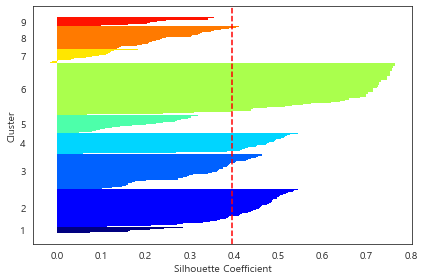

In [7]:
# 실루엣 계수 시각화

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df_sub, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks=[]
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color=cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.tight_layout()
plt.show()

In [8]:
silhouette_avg

0.3962459057732037

- 실루엣 계수의 값이 0을 벗어나는 것도 있음. 이는 군집이 잘 되지 못했음을 의미함.
- 군집의 품질을 요약하기 위해 평균 실루엣 계수를 그래프에 추가했으며, 0.39의 값을 가짐.

#### k=9로 0~8까지의 군집을 형성하고, 결과를 데이터프레임에 칼럼으로 추가

In [9]:
# 'group' 칼럼의 데이터 프레임으로 형성
df_group = pd.DataFrame(y_km)
df_group.columns = ['group']

# 원본 df에 'group' 칼럼 추가
cols = ['기준_년_코드', '역명', '호선', '장애인편의시설', '만남의장소', '현장사무소', '민원안내', '환승주차장', '지하철이용객수', 
            '자전거보관가능대수', '환승거리', '환승역개수', '엘리베이터', '에스컬레이터', '휠체어경사로', '휠체어리프트']
df_tmp1 = df[cols].join(df_group, how='inner')
df_tmp1
df_tmp2 = df.drop(columns=cols, axis=1)
df_final = df_tmp1.join(df_tmp2, how='inner')
df_final

,기준_년_코드,역명,호선,장애인편의시설,만남의장소,현장사무소,민원안내,환승주차장,지하철이용객수,자전거보관가능대수,...,구간이동전입.1,구간이동전출.1,시도간이동전입.1,시도간이동전출.1,거주_세대_수.1,거주인구_총계.1,거주인구_남자.1,거주인구_여자.1,세대당인구.1,고령자_65세이상.1
0,2016,4.19민주묘지역,우이신설,0,0,0,0,0,0.829532,0.755984,...,1009,1238,2476,925,9489,21391,10393,10998,2,4557
1,2016,가락시장역,3,0,0,0,0,0,0.520235,0.919707,...,4445,1017,12170,1265,11345,29837,14646,15191,2,3321
2,2016,가락시장역,8,1,0,0,0,0,0.475656,0.818231,...,4445,1017,12170,1265,11345,29837,14646,15191,2,3321
3,2016,가산디지털단지역,7,1,0,0,0,0,0.889632,0.775517,...,1908,1930,5440,2462,13767,24455,13720,10735,1,2414
4,2016,가양역,9,0,0,0,0,0,0.527622,0.784574,...,2532,1872,5831,1778,15720,42579,20772,21807,2,3963
5,2016,가오리역,우이신설,0,0,0,0,0,0.829532,0.755984,...,1126,1287,2963,1058,11335,24339,11872,12466,2,4848
6,2016,가좌역,경의중앙,0,0,0,0,0,0.498724,0.545269,...,1254,1425,2706,906,8790,18768,9152,9784,2,3077
7,2016,강남구청역,7,1,1,0,0,0,0.661191,0.610978,...,1309,1522,3823,1157,9723,22797,11056,11740,2,2679
8,2016,강남역,2,1,0,0,1,0,1.000000,0.718128,...,3215,3324,8536,2945,19589,37169,17691,19478,1,3498
9,2016,강동구청역,8,1,0,0,0,0,0.557457,0.930890,...,1304,1416,4508,3099,14325,34961,17128,17833,2,4525


In [10]:
df_final.to_csv('final_clustering(Jihyun).csv', index = False)

#### Group 별 값의 평균 확인

In [11]:
df_group_mean1 = df_final.groupby(['group', '역명'], as_index=False).mean()
df_group_mean1

,group,역명,기준_년_코드,장애인편의시설,만남의장소,현장사무소,민원안내,환승주차장,지하철이용객수,자전거보관가능대수,...,구간이동전입.1,구간이동전출.1,시도간이동전입.1,시도간이동전출.1,거주_세대_수.1,거주인구_총계.1,거주인구_남자.1,거주인구_여자.1,세대당인구.1,고령자_65세이상.1
0,0,강남역,2016,1,0,0,1,0,1.000000,0.718128,...,3215,3324,8536,2945,19589,37169,17691,19478,1,3498
1,0,강변역,2016,1,0,0,1,0,0.943534,0.911616,...,1646,1984,4302,1576,11930,24495,11392,13039,1,2114
2,0,개봉역,2016,1,0,0,1,0,0.457012,0.853037,...,1691,2030,3638,1830,13263,37188,18200,18988,2,3901
3,0,대치역,2016,1,0,0,1,0,0.591601,0.777057,...,1812,1867,4613,1385,9464,25732,12730,13002,2,2872
4,0,삼성역,2016,1,0,0,1,0,0.976684,0.796011,...,1309,1522,3823,1157,9723,22797,11056,11740,2,2679
5,0,선릉역,2016,1,0,0,1,0,0.945707,0.709551,...,1309,1522,3823,1157,9723,22797,11056,11740,2,2679
6,0,성신여대입구역,2016,1,0,0,1,0,0.784487,0.452364,...,968,1411,3387,1005,9057,16276,6739,9537,1,2201
7,0,온수역,2016,1,0,0,1,1,0.563123,0.644755,...,777,676,2692,1720,9863,24890,12350,12540,2,3989
8,0,합정역,2016,1,0,0,1,0,0.612602,0.569804,...,1367,1779,3970,1425,11838,22575,10328,12246,1,2978
9,0,행당역,2016,1,0,0,1,0,0.490267,0.545269,...,714,1170,2919,1210,7435,13543,6721,6822,1,1453


In [12]:
df_group_mean2 = df_final.groupby(['group']).agg(np.mean).T
df_group_mean2

group,0,1,2,3,4,5,6,7,8
기준_년_코드,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03,2.016000e+03
장애인편의시설,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
만남의장소,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.234568e-02,3.333333e-01,0.000000e+00,1.000000e+00
현장사무소,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.703704e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
민원안내,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
환승주차장,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.285714e-01
지하철이용객수,7.365018e-01,5.958814e-01,6.442743e-01,6.385866e-01,6.481290e-01,6.129453e-01,6.240584e-01,5.643238e-01,7.482465e-01
자전거보관가능대수,6.977592e-01,6.713996e-01,6.290407e-01,6.293654e-01,6.863044e-01,7.258101e-01,7.870147e-01,6.225549e-01,7.383610e-01
환승거리,4.456574e-01,0.000000e+00,8.088992e-01,0.000000e+00,8.091277e-01,6.028478e-03,3.343546e-01,7.933903e-01,2.222770e-01
환승역개수,2.500000e-01,2.190646e-02,4.954609e-01,3.030303e-02,4.137009e-01,4.682076e-02,2.380952e-01,4.549290e-01,7.142857e-02


### 3.2 클러스터링 결과 시각화

In [13]:
df = pd.read_csv('final_tmp(Jihyun).csv', encoding='cp949')
gr = pd.read_csv('final_clustering(Jihyun).csv')

In [14]:
df['group'] = gr['group']
df.group.value_counts()
gr = df.groupby('group').mean().reset_index()

- 파란색: 해당 목표변수를 설명할 수 있는 그룹 (낮은 값)

- 빨간색: 해당 목표변수를 설명할 수 있는 그룹 (높은 값)

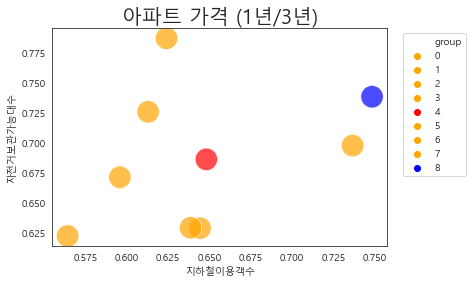

In [15]:
color_dict = dict({0:'orange',
                   1:'orange',
                   2:'orange',
                   3:'orange',
                   4:'red',
                   5:'orange',
                   6:'orange',
                   7:'orange',
                   8:'blue'})

sns.scatterplot(x='지하철이용객수', y='자전거보관가능대수', data=gr, hue='group',
                s=500, palette=color_dict,
                alpha=0.7, legend='full')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1.0))
plt.title('아파트 가격 (1년/3년)', fontsize=20);

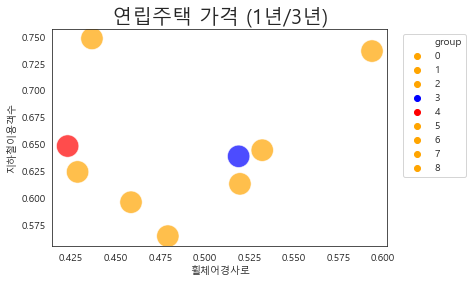

In [18]:
color_dict = dict({0:'orange',
                   1:'orange',
                   2:'orange',
                   3:'blue',
                   4:'red',
                   5:'orange',
                   6:'orange',
                   7:'orange',
                   8:'orange'})

sns.scatterplot(x='휠체어경사로', y='지하철이용객수', data=gr, hue='group',
                s=500, palette=color_dict,
                alpha=0.7, legend='full')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1.0))
plt.title('연립주택 가격 (1년/3년)', fontsize=20);

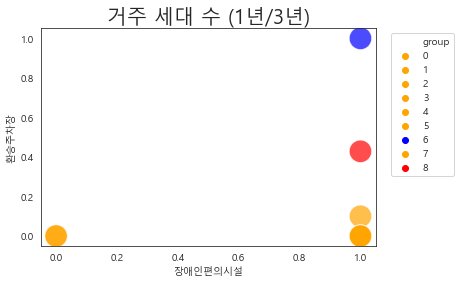

In [19]:
color_dict = dict({0:'orange',
                   1:'orange',
                   2:'orange',
                   3:'orange',
                   4:'orange',
                   5:'orange',
                   6:'blue',
                   7:'orange',
                   8:'red'})

sns.scatterplot(x='장애인편의시설', y='환승주차장', data=gr, hue='group',
                s=500, palette=color_dict,
                alpha=0.7, legend='full')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1.0))
plt.title('거주 세대 수 (1년/3년)', fontsize=20);

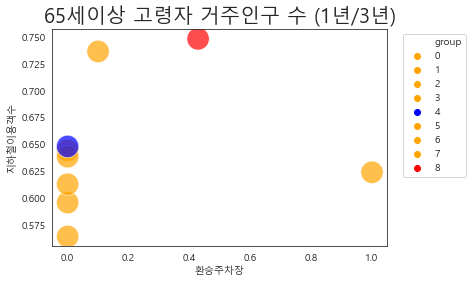

In [20]:
color_dict = dict({0:'orange',
                   1:'orange',
                   2:'orange',
                   3:'orange',
                   4:'blue',
                   5:'orange',
                   6:'orange',
                   7:'orange',
                   8:'red'})

sns.scatterplot(x='환승주차장', y='지하철이용객수', data=gr, hue='group',
                s=500, palette=color_dict,
                alpha=0.7, legend='full')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1.0))
plt.title('65세이상 고령자 거주인구 수 (1년/3년)', fontsize=20);

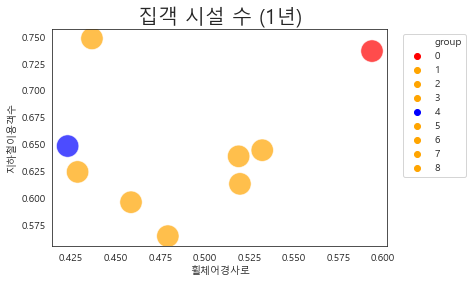

In [21]:
color_dict = dict({0:'red',
                   1:'orange',
                   2:'orange',
                   3:'orange',
                   4:'blue',
                   5:'orange',
                   6:'orange',
                   7:'orange',
                   8:'orange'})

sns.scatterplot(x='휠체어경사로', y='지하철이용객수', data=gr, hue='group',
                s=500, palette=color_dict,
                alpha=0.7, legend='full')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1.0))
plt.title('집객 시설 수 (1년)', fontsize=20);

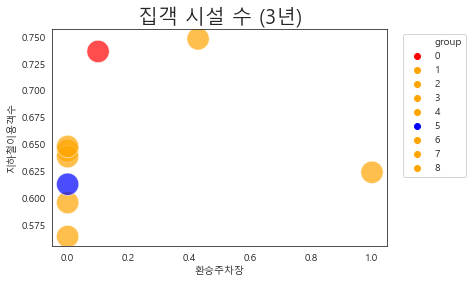

In [22]:
color_dict = dict({0:'red',
                   1:'orange',
                   2:'orange',
                   3:'orange',
                   4:'orange',
                   5:'blue',
                   6:'orange',
                   7:'orange',
                   8:'orange'})

sns.scatterplot(x='환승주차장', y='지하철이용객수', data=gr, hue='group',
                s=500, palette=color_dict,
                alpha=0.7, legend='full')
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1.0))
plt.title('집객 시설 수 (3년)', fontsize=20);